<h3>1. Import module yang dibutuhkan</h3>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [4]:
imagePaths = 'dataset\\'
label_list = ['Daun Kemangi', 'Daun Seledri']
data = []
labels = []

In [5]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [6]:
np.array(data).shape

(100, 32, 32, 3)

<h3>3. Data Preprocessing</h3>

In [7]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [8]:
print(labels)

['Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi' 'Daun Kemangi'
 'Daun Kemangi' 'Daun Kemangi' 'Daun Seledri' 'Daun Seledri'
 'Daun Seledri' 'Daun Seledri' 'Daun Seledri' 'Daun Seledri'
 'Daun Seledri' 'Daun Seledri' 'Daun Seledri' 'Daun Seledri'
 'Daun Seledri' 'Daun Seledri' 'Daun Seledri' 'Daun Seledri'
 'Daun Seledri' 'Daun Se

In [9]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>4. Split Dataset</h3>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [11]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h3>5. Build CNN Architecture</h3>

In [12]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [14]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [15]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [16]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 188ms/step - loss: 0.9194 - accuracy: 0.4875 - val_loss: 0.9451 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 72ms/step - loss: 0.7899 - accuracy: 0.4625 - val_loss: 0.6828 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 83ms/step - loss: 0.8249 - accuracy: 0.4875 - val_loss: 0.6602 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 71ms/step - loss: 0.6836 - accuracy: 0.5500 - val_loss: 0.7766 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 87ms/step - loss: 0.6984 - accuracy: 0.5250 - val_loss: 0.7471 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 80ms/step - loss: 0.6779 - accuracy: 0.5750 - val_loss: 0.6831 - val_accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 85ms/step - loss: 0.6740 - accuracy: 0.5750 - val_loss: 0.6481 - val_accuracy: 0.6000
Epoch 8/100
3/3 [==

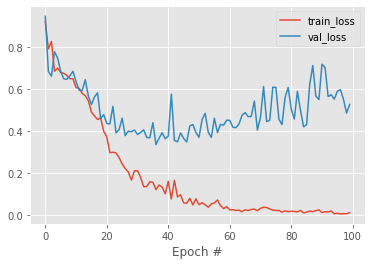

In [17]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [19]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.float64)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

Daun Kemangi       1.00      0.83      0.91        12
Daun Seledri       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



In [33]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_daun_kemangi.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.02337292]]


In [34]:
if q_pred<=0.5 :
    target = "Daun Kemangi"
else :
    target = "Daun Seledri"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose